In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_PL")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Label,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,30879,0,64.585900,0,27.0,0.377501,128.715226,0.422342,115.630163,15.181458,...,286.270009,0.289728,206.373786,44.577974,539.225137,3.320292,22924.739100,3.3445,2251,7338.2
1,31129,0,68.076660,2,20.0,0.657212,51.830551,0.557254,84.225204,8.530596,...,282.873623,0.310507,206.276556,39.697933,542.232602,2.864138,18182.687670,2.9605,2924,5438.6
2,30605,1,76.221760,1,28.0,0.520032,86.558742,0.594543,123.662642,13.400504,...,244.274039,0.370189,201.216707,46.081559,560.592790,3.415186,28045.350990,3.3145,4042,8434.4
3,30039,0,73.221085,0,30.0,0.396133,60.731686,0.596733,122.546512,15.571183,...,226.713342,0.517430,232.983710,30.461877,705.221498,2.937422,1196.160472,3.1505,3485,7476.2
4,30079,0,45.872690,0,30.0,0.404800,108.808540,0.520363,98.065558,13.483247,...,202.074647,0.354851,169.528802,50.680275,476.040561,3.017047,47743.254120,3.5420,3964,8021.8


In [3]:
dataset.columns

Index(['Label', 'Gender', 'Age', 'DIAGNOSIS', 'MMSE', 'Hip ASM',
       'Hip Contrast', 'Hip Correlation', 'Hip Variance ', 'Hip Sum Average',
       'Hip Sum Variance', 'Hip Entropy', 'Hip Clusterhade', 'ERC ASM',
       'ERC CONTRAST', 'ERC CORRELATION', 'ERC VARIANCE ', 'ERC SUM AVERAGE',
       'ERC SUM VARIANCE', 'ERC ENTROPY', 'ERC CLUSTER SHADE',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'TOTAL_HIPPOCAMPUS_VOLUME'],
      dtype='object')

In [4]:
# Split by subject
subjects = dataset['Label'].unique()
first_diag_per_subject = dataset.groupby('Label')['DIAGNOSIS'].first()

train_subs, test_subs = train_test_split(
    subjects,
    test_size=0.3,
    random_state=42,
    stratify=first_diag_per_subject
)

# Assign rows
train_df = dataset[dataset['Label'].isin(train_subs)].copy()
test_df  = dataset[dataset['Label'].isin(test_subs)].copy()

# Separate X and y
y_train = train_df['DIAGNOSIS']
y_test  = test_df['DIAGNOSIS']
X_train = train_df.drop(columns=['DIAGNOSIS'])
X_test  = test_df.drop(columns=['DIAGNOSIS'])

# -----------------------------
# Check for subject-level overlap
# -----------------------------
overlap_subjects = set(train_df['Label']).intersection(set(test_df['Label']))
if len(overlap_subjects) == 0:
    print("No subjects appear in both train and test sets.")
else:
    print(f"Overlapping subjects found: {overlap_subjects}")

print(f"Number of subjects in train: {len(train_df['Label'].unique())}")
print(f"Number of subjects in test: {len(test_df['Label'].unique())}")


No subjects appear in both train and test sets.
Number of subjects in train: 508
Number of subjects in test: 219


In [5]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(),
    random_state=42,
)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(),
    random_state=42,
)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(),
    random_state=42,
)

In [6]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)

imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

IterativeImputer(estimator=ExtraTreesRegressor(), random_state=42)

In [7]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

In [8]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

In [9]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


In [10]:
from sklearn.preprocessing import StandardScaler

cols = [
       'Hip ASM','Hip Contrast', 'Hip Correlation', 
       'Hip Variance ', 'Hip Sum Average','Hip Sum Variance', 
       'Hip Entropy', 'Hip Clusterhade', 'ERC ASM',
       'ERC CONTRAST', 'ERC CORRELATION', 'ERC VARIANCE ', 
       'ERC SUM AVERAGE','ERC SUM VARIANCE', 'ERC ENTROPY', 
       'ERC CLUSTER SHADE','ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'TOTAL_HIPPOCAMPUS_VOLUME'
]

scaler = StandardScaler()

# X_train_bayes_t
X_train_bayes_t[cols] = scaler.fit_transform(X_train_bayes_t[cols])

# X_test_bayes_t
X_test_bayes_t[cols] = scaler.transform(X_test_bayes_t[cols])

# X_train_knn_t
X_train_knn_t[cols] = scaler.fit_transform(X_train_knn_t[cols])

# X_test_knn_t
X_test_knn_t[cols] = scaler.transform(X_test_knn_t[cols])

# X_train_nonLin_t
X_train_nonLin_t[cols] = scaler.fit_transform(X_train_nonLin_t[cols])

# X_test_nonLin_t
X_test_nonLin_t[cols] = scaler.transform(X_test_nonLin_t[cols])

# X_train_missForest_t
X_train_missForest_t[cols] = scaler.fit_transform(X_train_missForest_t[cols])

# X_test_missForest_t
X_test_missForest_t[cols] = scaler.transform(X_test_missForest_t[cols])


### Stratified Cross-Validation


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier_name, imp_method, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=10,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted", zero_division=0), 
                   "recall": make_scorer(recall_score, average="weighted", zero_division=0), 
                   "f1_weighted": make_scorer(f1_score, average="weighted", zero_division=0),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [12]:
bayes_model, bayes_metrics = run_random_forest("Random Forest", "Ridge Bayes", X_train_bayes_t, y_train)
knn_model, knn_metrics = run_random_forest("Random Forest", "KNN Reg", X_train_knn_t, y_train)
nonLin_model, nonLin_metrics = run_random_forest("Random Forest", "NonLin", X_train_nonLin_t, y_train)
missForest_model, missForest_metrics = run_random_forest("Random Forest", "MissForest", X_train_missForest_t, y_train)

In [13]:
validation_df = pd.concat([bayes_metrics, knn_metrics, nonLin_metrics, missForest_metrics])
validation_df_report = validation_df.set_index(["Classifier", "Imputation", "Fit Time", "Metric"])
validation_df_report

Mean Train  \
Classifier    Imputation  Fit Time Metric                             
Random Forest Ridge Bayes 0.417    accuracy                   0.951   
                                   balanced_accuracy          0.932   
                                   precision                  0.952   
                                   recall                     0.951   
                                   f1_weighted                0.951   
                                   roc_auc_ovr_weighted       0.986   
              KNN Reg     0.331    accuracy                   0.947   
                                   balanced_accuracy          0.928   
                                   precision                  0.947   
                                   recall                     0.947   
                                   f1_weighted                0.947   
                                   roc_auc_ovr_weighted       0.986   
              NonLin      0.344    accuracy                   0.949   
                                   balanced_accuracy          0.926   
                                   precision                  0.949   
                                   recall                     0.949   
                                   f1_weighted                0.949   
                                   roc_auc_ovr_weighted       0.986   
              MissForest  0.340    accuracy                   0.949   
                                   balanced_accuracy          0.931   
                                   precision                  0.949   
                                   recall                     0.949   
                                   f1_weighted                0.949   
                                   roc_auc_ovr_weighted       0.986   

                                                         Std Train  Mean Test  \
Classifier    Imputation  Fit Time Metric                                       
Random Forest Ridge Bayes 0.417    accuracy                  0.005      0.825   
                                   balanced_accuracy         0.011      0.563   
                                   precision                 0.005      0.782   
                                   recall                    0.005      0.825   
                                   f1_weighted               0.005      0.798   
                                   roc_auc_ovr_weighted      0.002      0.869   
              KNN Reg     0.331    accuracy                  0.006      0.823   
                                   balanced_accuracy         0.012      0.565   
                                   precision                 0.005      0.783   
                                   recall                    0.006      0.823   
                                   f1_weighted               0.005      0.798   
                                   roc_auc_ovr_weighted      0.002      0.865   
              NonLin      0.344    accuracy                  0.006      0.833   
                                   balanced_accuracy         0.014      0.571   
                                   precision                 0.006      0.784   
                                   recall                    0.006      0.833   
                                   f1_weighted               0.006      0.806   
                                   roc_auc_ovr_weighted      0.002      0.864   
              MissForest  0.340    accuracy                  0.005      0.827   
                                   balanced_accuracy         0.011      0.569   
                                   precision                 0.005      0.781   
                                   recall                    0.005      0.827   
                                   f1_weighted               0.005      0.801   
                                   roc_auc_ovr_weighted      0.002      0.869   

                                                         Std Test  
Classifier    Imputation  Fit Time 

C:\Users\steve\AppData\Local\Temp\ipykernel_18320\265476517.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


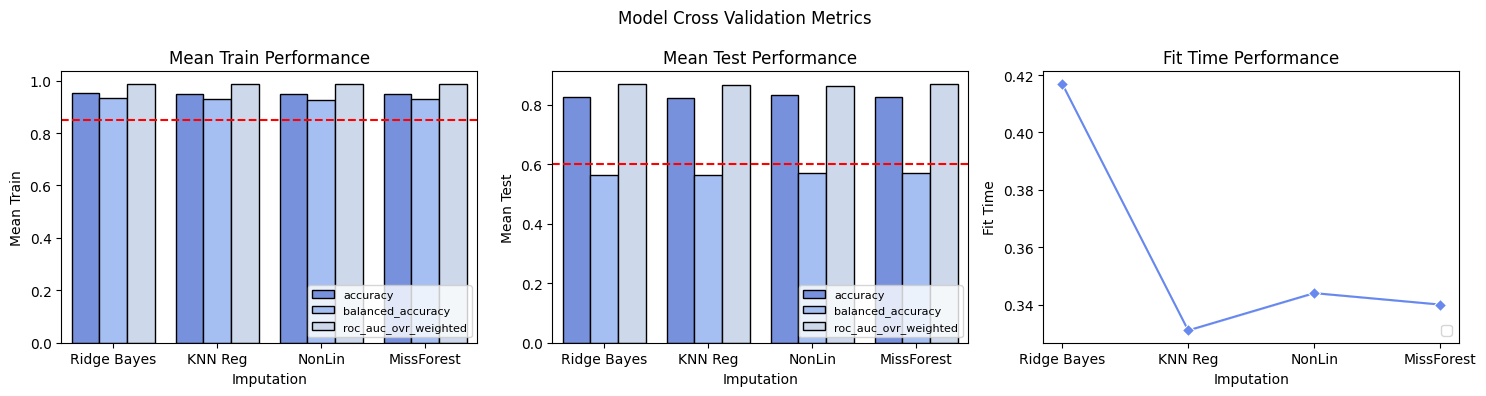

In [14]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_validation = validation_df[validation_df['Metric'].isin(metrics_to_plot)]
filtered_df_validation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Validation Metrics")
sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Train', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower right",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Mean Train Performance")

sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Test', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower right",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Mean Test Performance")

sns.lineplot(data=filtered_df_validation, x='Imputation', y=filtered_df_validation['Fit Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()

### Evaluate

In [15]:
from sklearn.utils import resample

def bootstrap_ci(model, X, y, metric_fn, n_iterations, ci=0.95, use_proba=False):
    scores = []
    n = len(X)
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y, n_samples=n, stratify=y)
        try:
            y_pred = model.predict_proba(X_resampled) if use_proba else model.predict(X_resampled)
            score = metric_fn(y_resampled, y_pred)
            if not np.isnan(score):
                scores.append(score)
        except Exception:
            # Skip this bootstrap sample if error occurs (e.g. missing class for roc_auc)
            continue
    if len(scores) == 0:
        return (np.nan, np.nan)
    lower = np.percentile(scores, (1 - ci) / 2 * 100)
    upper = np.percentile(scores, (1 + ci) / 2 * 100)
    std_dev = np.std(scores)
    return round(lower, 3), round(upper, 3), round(std_dev, 3)

In [16]:
from sklearn.metrics import confusion_matrix

def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total = cm.sum()
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = total - (tp + fp + fn)
    specificity = tn / (tn + fp)
    return round(np.nanmean(specificity), 3)

In [17]:
import time

def eval_random_forest(classifier_name, imp_method, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        metrics_train = {
                "accuracy": accuracy_score(y_train, pred_train),
                "balanced_accuracy": balanced_accuracy_score(y_train, pred_train),
                "precision_macro": precision_score(y_train, pred_train, average="macro", zero_division=0),
                "recall_macro": recall_score(y_train, pred_train, average="macro", zero_division=0),
                "f1_macro": f1_score(y_train, pred_train, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_train, pred_train_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_train, pred_train),
        }

        metrics_test = {
                "accuracy": accuracy_score(y_test, pred_test),
                "balanced_accuracy": balanced_accuracy_score(y_test, pred_test),
                "precision_macro": precision_score(y_test, pred_test, average="macro", zero_division=0),
                "recall_macro": recall_score(y_test, pred_test, average="macro", zero_division=0),
                "f1_macro": f1_score(y_test, pred_test, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_test, pred_test_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_test, pred_test),
        }
                
        elapsed_time = time.time() - start_time

        # Bootstrap functions
        metric_fns = {
                "accuracy": accuracy_score,
                "balanced_accuracy": balanced_accuracy_score,
                "precision_macro": lambda yt, yp: precision_score(yt, yp, average="macro", zero_division=0),
                "recall_macro": lambda yt, yp: recall_score(yt, yp, average="macro", zero_division=0),
                "f1_macro": lambda yt, yp: f1_score(yt, yp, average="macro", zero_division=0),
                "roc_auc_macro": lambda yt, yp: roc_auc_score(yt, yp, average="macro", multi_class="ovr"),
                "specificity_macro": lambda yt, yp: compute_specificity(yt, yp),
        }

        # Bootstrap confidence intervals
        ci_test = {
                m: bootstrap_ci(
                model, X_test, y_test, fn,
                n_iterations=100,
                use_proba=(m == "roc_auc_macro")
                )
                for m, fn in metric_fns.items()
        }

        # Separate CI bounds and std with clear variable names
        ci_bounds = []
        std_values = []
                
        for lower, upper, std in ci_test.values():
                ci_bounds.append(f"[{round(lower, 3)}, {round(upper, 3)}]")
                std_values.append(round(std, 3)) 
                
        # Round metric values
        train_rounded = [round(score, 3) for score in metrics_train.values()]
        test_rounded = [round(score, 3) for score in metrics_test.values()] 

        
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Classification Time": round(elapsed_time, 3),
                "Metric": metrics_train.keys(),
                "Train data": train_rounded,
                "Test data": test_rounded,
                "95% CI": ci_bounds,
                "Std Dev": std_values,
    })
        
        return pred_metrics_df

In [18]:
pred_bayes = eval_random_forest("Random Forest", "Ridge Bayes", bayes_model, X_train_bayes_t, X_test_bayes_t, y_train, y_test)
pred_knn = eval_random_forest("Random Forest", "KNN Reg", knn_model, X_train_knn_t, X_test_knn_t, y_train, y_test)
pred_nonLin = eval_random_forest("Random Forest", "NonLin", nonLin_model, X_train_nonLin_t, X_test_nonLin_t, y_train, y_test)
pred_missForest = eval_random_forest("Random Forest", "MissForest", missForest_model, X_train_missForest_t, X_test_missForest_t, y_train, y_test)

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_imputer_roc(models_dict, X_tests, y_test, show_per_class=False):
    """
    Plot ROC curves per imputation method using sklearn's roc_auc_score for macro-AUC.
    
    Args:
        models_dict (dict): Dictionary of models {imputer_name: trained_model}
        X_tests (dict): Dictionary of test sets {imputer_name: X_test}
        y_test (array-like): True labels
        show_per_class (bool): Whether to plot ROC for each class
    """
    classes = sorted(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=classes)  # One-hot encode
    
    plt.figure(figsize=(8,6))
    
    for imp, model in models_dict.items():
        X_test = X_tests[imp]
        y_proba = model.predict_proba(X_test)
        
        # Compute per-class ROC
        fpr = dict()
        tpr = dict()
        aucs = []
        for i in range(len(classes)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            aucs.append(auc(fpr[i], tpr[i]))
            
            # Optional: plot per-class curve
            if show_per_class:
                plt.plot(fpr[i], tpr[i], linestyle='--', alpha=0.3, label=f'{imp} - Class {classes[i]}')
        
        # Compute official macro-AUC using sklearn
        auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
        
        # Compute macro-average TPR for smooth plotting
        fpr_macro = np.linspace(0, 1, 100)
        tpr_macro = np.mean([np.interp(fpr_macro, fpr[i], tpr[i]) for i in range(len(classes))], axis=0)
        
        plt.plot(fpr_macro, tpr_macro, linewidth=2, label=f'{imp} (AUC={auc_macro:.3f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves per Imputer (OASIS-3)")
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()


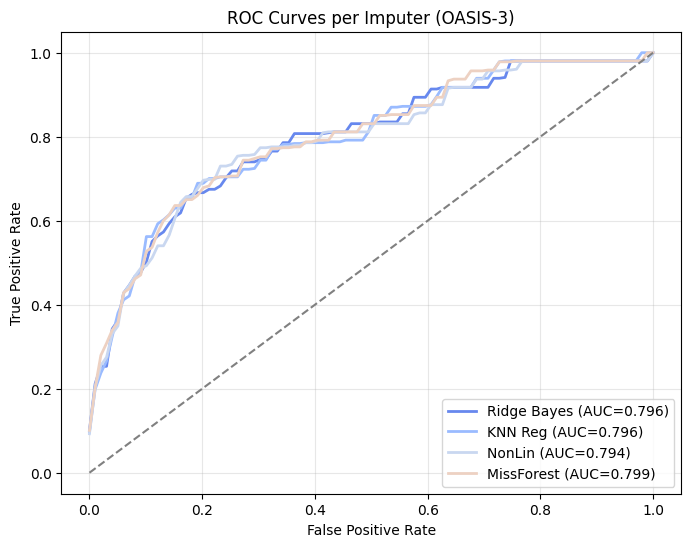

In [26]:
models_dict = {
    "Ridge Bayes": bayes_model,
    "KNN Reg": knn_model,
    "NonLin": nonLin_model,
    "MissForest": missForest_model
}

X_tests = {
    "Ridge Bayes": X_test_bayes_t,
    "KNN Reg": X_test_knn_t,
    "NonLin": X_test_nonLin_t,
    "MissForest": X_test_missForest_t
}

plot_imputer_roc(models_dict, X_tests, y_test, show_per_class=False)


In [21]:
prediction_df = pd.concat([pred_bayes, pred_knn, pred_nonLin, pred_missForest])
prediction_df_report = prediction_df.set_index(["Classifier", "Imputation",	"Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier    Imputation  Classification Time Metric                          
Random Forest Ridge Bayes 0.155               accuracy                0.943   
                                              balanced_accuracy       0.920   
                                              precision_macro         0.926   
                                              recall_macro            0.920   
                                              f1_macro                0.923   
                                              roc_auc_macro           0.987   
                                              specificity_macro       0.953   
              KNN Reg     0.142               accuracy                0.943   
                                              balanced_accuracy       0.920   
                                              precision_macro         0.939   
                                              recall_macro            0.920   
                                              f1_macro                0.929   
                                              roc_auc_macro           0.987   
                                              specificity_macro       0.953   
              NonLin      0.084               accuracy                0.943   
                                              balanced_accuracy       0.910   
                                              precision_macro         0.935   
                                              recall_macro            0.910   
                                              f1_macro                0.922   
                                              roc_auc_macro           0.987   
                                              specificity_macro       0.950   
              MissForest  0.084               accuracy                0.939   
                                              balanced_accuracy       0.919   
                                              precision_macro         0.915   
                                              recall_macro            0.919   
                                              f1_macro                0.917   
                                              roc_auc_macro           0.988   
                                              specificity_macro       0.951   

                                                                 Test data  \
Classifier    Imputation  Classification Time Metric                         
Random Forest Ridge Bayes 0.155               accuracy               0.845   
                                              balanced_accuracy      0.560   
                                              precision_macro        0.534   
                                              recall_macro           0.560   
                                              f1_macro               0.546   
                                              roc_auc_macro          0.796   
                                              specificity_macro      0.840   
              KNN Reg     0.142               accuracy               0.845   
                                              balanced_accuracy      0.560   
                                              precision_macro        0.527   
                                              recall_macro           0.560   
                                              f1_macro               0.543   
                                              roc_auc_macro          0.796   
                                              specificity_macro      0.840   
              NonLin      0.084               accuracy               0.845   
                                              balanced_accuracy      0.560   
                                              precision_macro        0.532   
                                              recall_macro           0.560   
                                              f1_macro               0.545   
                                              roc_auc_ma

C:\Users\steve\AppData\Local\Temp\ipykernel_18320\169164776.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


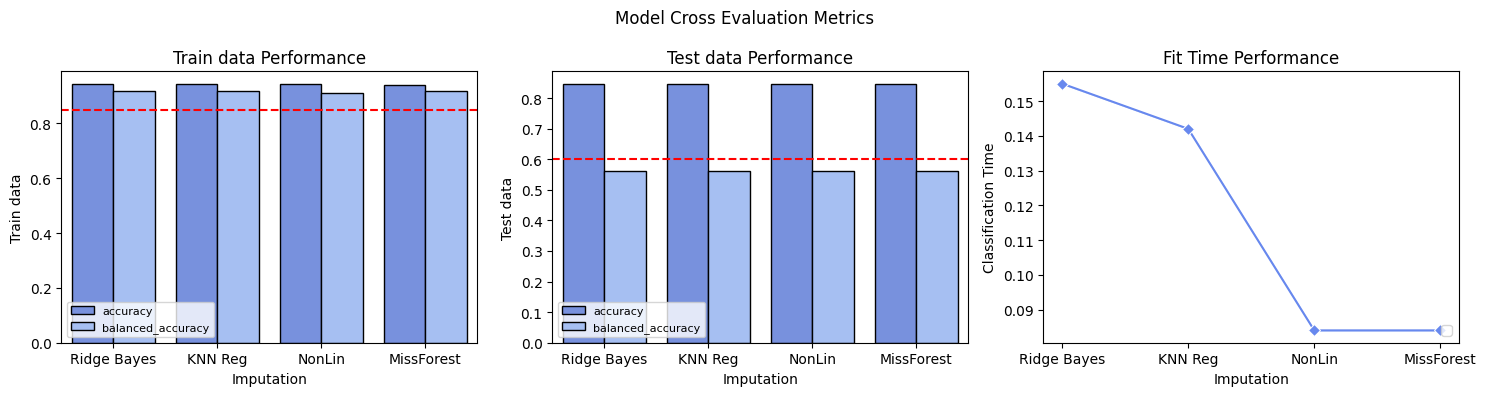

In [22]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_evaluation = prediction_df[prediction_df['Metric'].isin(metrics_to_plot)]
filtered_df_evaluation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Evaluation Metrics")
sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Train data', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower left",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Train data Performance")

sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Test data', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower left",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Test data Performance")

sns.lineplot(data=filtered_df_evaluation, x='Imputation', y=filtered_df_evaluation['Classification Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()